(383, 900, 3)


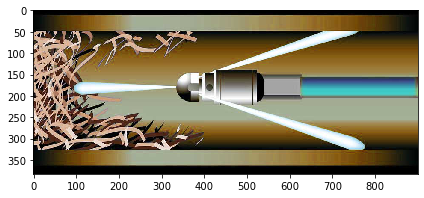

In [1]:
#importing required libraries
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('./n/hydro.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


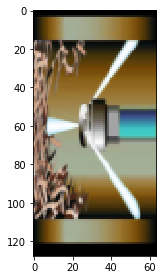

In [8]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [9]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\OWNER1\AppData\Local\Temp\ipykernel_6028\3528954607.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


In [15]:
fd.shape

(3780,)

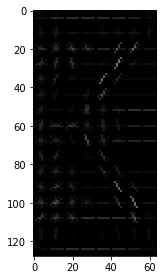

In [14]:
imshow(hog_image)

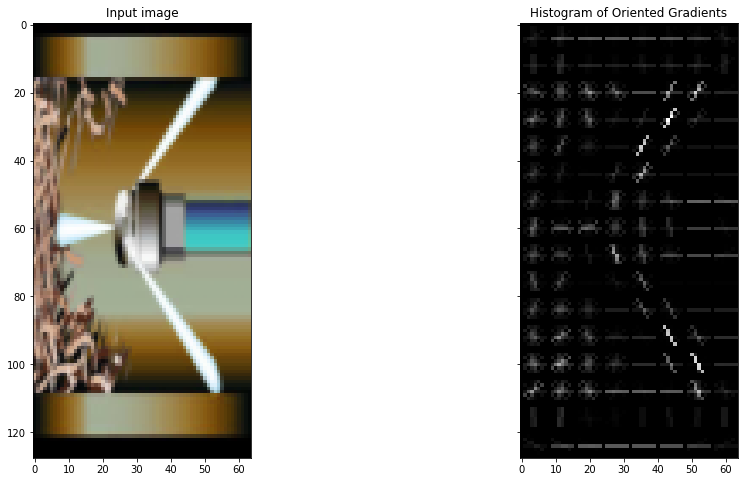

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [2]:
import os
import cv2
from sklearn.svm import LinearSVC
from skimage import feature
from skimage.io import imread, imshow
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [10]:
images = []
labels = []
# get all the image folder paths
all_images = os.listdir(r"C:\Users\OWNER1\Documents\My Received Files\n")
#print(image_paths)
for img in all_images:
    image_path = f"n/{img}"
    print(image_path)
    image = cv2.imread(image_path)
    print(image)
    image = cv2.resize(image, (80, 80))
    # get the HOG descriptor for the image
    print(image)
    hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', multichannel=True)
    
    # update the data and labels
    images.append(hog_desc)
    labels.append(img)

n/hydro.jpg
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 7  7  7]
  [12 12 12]
  [22 22 22]
  ...
  [18 18 18]
  [10 10 10]
  [ 6  6  6]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
n/plumbing.jpg
[[[29 29 29]
  [16 16 16]
  [14 14 14

C:\Users\OWNER1\AppData\Local\Temp\ipykernel_1540\797616007.py:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),


In [11]:
labels =  np.array(labels).reshape(len(labels),1)

In [12]:
labels

array([['hydro.jpg'],
       ['plumbing.jpg']], dtype='<U12')

In [13]:
hog_features = np.array(images)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

In [14]:
data_frame

array([['0.03532390463103527', '0.0', '0.008715125713169314', ..., '0.0',
        '0.0', 'plumbing.jpg'],
       ['0.23924042230886236', '0.014228718268485397', '0.0', ..., '0.0',
        '0.17620811284531973', 'hydro.jpg']], dtype='<U32')